In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

pd.set_option("display.max_columns", 100)

In [2]:
xqrs = pd.read_csv('../to_csv/xqrs_v2.csv').drop('Unnamed: 0', axis=1)
xqrs = xqrs[xqrs['Patient'] == 11077]
xqrs.head()

,Set,Categorie Montage,Dossier Patient,Patient,Session,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train,01_tcp_ar,110,11077,s001_2013_12_16,t009,725,0.998914,1.0,0.0,0.0,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124017,train,01_tcp_ar,110,11077,s001_2013_12_16,t009,725,0.998914,1.0,1.0,10000.0,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124018,train,01_tcp_ar,110,11077,s001_2013_12_16,t009,725,0.998914,1.0,2.0,20000.0,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124019,train,01_tcp_ar,110,11077,s001_2013_12_16,t009,725,0.998914,1.0,3.0,30000.0,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124020,train,01_tcp_ar,110,11077,s001_2013_12_16,t009,725,0.998914,1.0,4.0,40000.0,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
xqrs.shape

(2529, 39)

In [4]:
xqrs['Date'] = xqrs.Session.str[-10:]
xqrs['Date'] = xqrs.Date.str.replace('_', '/')
xqrs['Date'] =  pd.to_datetime(xqrs['Date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')

xqrs.Session = xqrs.Session.str[:4]

cols = xqrs.columns.tolist()
cols = cols[:5] + ['Date'] + cols[5:-1]

xqrs = xqrs[cols]

xqrs.head()

,Set,Categorie Montage,Dossier Patient,Patient,Session,Date,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train,01_tcp_ar,110,11077,s001,16/12/2013,t009,725,0.998914,1.0,0.0,0.0,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124017,train,01_tcp_ar,110,11077,s001,16/12/2013,t009,725,0.998914,1.0,1.0,10000.0,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124018,train,01_tcp_ar,110,11077,s001,16/12/2013,t009,725,0.998914,1.0,2.0,20000.0,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124019,train,01_tcp_ar,110,11077,s001,16/12/2013,t009,725,0.998914,1.0,3.0,30000.0,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124020,train,01_tcp_ar,110,11077,s001,16/12/2013,t009,725,0.998914,1.0,4.0,40000.0,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
xqrs.describe(include='all')

,Set,Categorie Montage,Dossier Patient,Patient,Session,Date,File N°,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
count,2529,2529,2529.0,2529.0,2529,2529,2529,2529.000000,2529.000000,2529.000000,2529.000000,2.529000e+03,2519.000000,2510.000000,2510.000000,2521.000000,2521.000000,2521.000000,2521.000000,2510.000000,2519.000000,2521.000000,2509.000000,2509.000000,2519.000000,2521.000000,2521.000000,2509.000000,1879.000000,1879.000000,1879.000000,1879.000000,2240.000000,2240.000000,2240.000000,2242.000000,2240.000000,2240.000000,2240.000000,2497.000000
unique,1,1,NaN,NaN,4,3,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,train,01_tcp_ar,NaN,NaN,s001,17/12/2013,t005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2529,2529,NaN,NaN,798,1304,306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,110.0,11077.0,NaN,NaN,NaN,756.672598,0.999117,0.990240,37.629102,3.762910e+05,701.005061,4.621865,2.397555,0.010710,0.065968,0.020230,0.133055,2.561816,701.215295,12.925798,0.003668,0.006623,inf,inf,inf,0.560363,39.195737,7.073869,37.662308,19.932931,6.720883,2.474018,444.058199,inf,2.100725,13.265281,6.720883,0.154243
std,NaN,NaN,0.0,0.0,NaN,NaN,NaN,311.923641,0.001063,0.021267,28.437112,2.843711e+05,75.770332,5.179712,3.031342,0.160246,0.989718,0.206989,1.322588,3.103286,75.852254,15.467899,0.004864,0.008163,NaN,NaN,NaN,0.874747,81.215585,28.470402,53.824556,16.564569,3.495604,0.461865,709.459853,NaN,2.292857,10.437508,3.495604,0.354156
min,NaN,NaN,110.0,11077.0,NaN,NaN,NaN,84.000000,0.990566,0.899297,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.479683,68.266667,67.074236,0.000000,1.251456,0.196886,0.391112,0.976302,1.768177,1.311311,14.192749,0.047943,0.637888,1.823937,1.768177,0.000000
25%,NaN,NaN,110.0,11077.0,NaN,NaN,NaN,601.000000,0.998901,0.998030,15.000000,1.500000e+05,660.156250,2.026854,1.594720,0.000000,0.000000,0.000000,0.000000,1.594720,660.156250,7.812500,0.002316,0.003060,80.356517,81.269841,80.000000,0.261192,7.928933,0.660113,9.127402,7.888246,4.598359,2.153065,128.398410,0.318332,1.307922,6.550571,4.598359,0.000000
50%,NaN,NaN,110.0,11077.0,NaN,NaN,NaN,652.000000,0.999303,0.999640,32.000000,3.200000e+05,704.520089,3.376710,2.012026,0.000000,0.000000,0.000000,0.000000,2.166798,703.125000,7.812500,0.003110,0.004794,85.164957,85.810056,84.395604,0.398938,21.638714,0.981171,24.773916,15.028899,5.987876,2.470341,277.074670,0.467819,1.640208,11.026695,5.987876,0.000000
75%,NaN,NaN,110.0,11077.0,NaN,NaN,NaN,930.000000,1.000000,1.000000,54.000000,5.400000e+05,746.694712,5.615588,2.632249,0.000000,0.000000,0.000000,0.000000,2.866404,746.093750,15.625000,0.003984,0.007923,90.892073,91.976048,90.352941,0.653059,42.674227,1.946802,47.278899,27.036759,7.859908,2.731570,497.587218,0.630905,2.108011,16.654187,7.859908,0.000000


In [6]:
xqrs['Dossier Patient'] = xqrs['Dossier Patient'].astype(str)
xqrs['Patient'] = xqrs['Patient'].astype(str)

In [7]:
xqrs['Key'] = xqrs.Set + '_' + xqrs['Categorie Montage'] + '_' + xqrs['Patient'] + '_' + xqrs.Session + '_' + xqrs['File N°']
xqrs.drop(['Set', 'Categorie Montage', 'Patient', 'Session', 'File N°', 'Dossier Patient'], axis=1, inplace=True)

In [8]:
cols = xqrs.columns.tolist()
cols = cols[-1:] + cols[:-1]
xqrs = xqrs[cols]
xqrs.head()

,Key,Date,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,0.0,0.0,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124017,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,1.0,10000.0,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124018,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,2.0,20000.0,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124019,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,3.0,30000.0,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124020,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,4.0,40000.0,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [9]:
len(xqrs.Key.unique())

41

In [10]:
params = {}
for cols in xqrs.columns.tolist()[7:]:
    params[cols] = [lambda x: x.isnull().sum(), 
                    lambda x: x.count() + x.isnull().sum(), 
                    lambda x: (x.isnull().sum() / (x.count() + x.isnull().sum())) * 100]

In [11]:
count_nan_by_key = xqrs[['Key'] + xqrs.columns.tolist()[7:]]\
                                              .groupby('Key')\
                                              .agg(params)\
                                              .rename(columns={'<lambda_0>': 'NaN',
                                                               '<lambda_1>': 'total',
                                                               '<lambda_2>': '%'})

In [12]:
count_nan_by_key.shape

(41, 84)

In [13]:
total = np.zeros(count_nan_by_key.shape[0],)
i = 0
for cols in xqrs.columns.tolist()[7:]:
    sub_total = []
    for index, row in count_nan_by_key[(cols, '%')].iteritems():
        sub_total.append(row)
    i += 1
    total = np.add(total, sub_total)


total = total / 28

In [14]:
count_nan_by_key[('Total', 'Percent')] = total

In [15]:
crisis = xqrs[['Key', 'label']].groupby('Key').agg(lambda x: (x != 0).sum())

In [16]:
count_nan_by_key[('Total', 'Crisis')] = crisis.label.values

In [17]:
count_nan_by_key[count_nan_by_key[('Total', 'Percent')] < 10].sort_values(('Total', 'Percent'))

p_ar_11077_s005_t003  1.639344    1.0   61.0  1.639344    1.0   
train_01_tcp_ar_11077_s001_t010  0.000000    0.0   61.0  0.000000    2.0   
train_01_tcp_ar_11077_s001_t004  0.000000    0.0   48.0  0.000000    0.0   

                                                    lf                    \
                                 total         %   NaN  total          %   
Key                                                                        
train_01_tcp_ar_11077_s001_t000  148.0  0.675676  16.0  148.0  10.810811   
train_01_tcp_ar_11077_s001_t005  122.0  0.000000  16.0  122.0  13.114754   
train_01_tcp_ar_11077_s002_t003  110.0  0.000000  16.0  110.0  14.545455   
train_01_tcp_ar_11077_s003_t004  118.0  0.847458  16.0  118.0  13.559322   
train_01_tcp_ar_11077_s002_t002   96.0  0.000000  16.0   96.0  16.666667   
train_01_tcp_ar_11077_s002_t005   93.0  0.000000  16.0   93.0  17.204301   
train_01_tcp_ar_11077_s003_t001   91.0  0.000000  16.0   91.0  17.582418   
train_01_tcp_ar_11077_s003_t002   83.0  0.000000  16.0   83.0  19.277108   
train_01_tcp_ar_11077_s003_t003   77.0  0.000000  16.0   77.0  20.779221   
train_01_tcp_ar_11077_s001_t001   75.0  0.000000  16.0   75.0  21.333333   
train_01_tcp_ar_11077_s001_t009   73.0  0.000000  16.0   73.0  21.917808   
train_01_tcp_ar_11077_s003_t009   90.0  2.222222  16.0   90.0  17.777778   
train_01_tcp_ar_11077_s003_t006   70.0  0.000000  16.0   70.0  22.857143   
train_01_tcp_ar_11077_s001_t002   66.0  0.000000  16.0   66.0  24.242424   
train_01_tcp_ar_11077_s001_t008   61.0  0.000000  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s003_t007   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s005_t002   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s005_t005   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s002_t006   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s005_t007   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s002_t004   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s001_t006   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s005_t009   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s002_t007   55.0  0.000000  16.0   55.0  29.090909   
train_01_tcp_ar_11077_s002_t001   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s003_t011   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s005_t003   61.0  1.639344  16.0   61.0  26.229508   
train_01_tcp_ar_11077_s001_t010   61.0  3.278689  17.0   61.0  27.868852   
train_01_tcp_ar_11077_s001_t004   48.0  0.000000  16.0   48.0  33.333333   

                                   hf                     vlf         \
                                  NaN  total          %   NaN  total   
Key                                                                    
train_01_tcp_ar_11077_s001_t000  16.0  148.0  10.810811  16.0  148.0   
train_01_tcp_ar_11077_s001_t005  16.0  122.0  13.114754  16.0  122.0   
train_01_tcp_ar_11077_s002_t003  16.0  110.0  14.545455  16.0  110.0   
train_01_tcp_ar_11077_s003_t004  16.0  118.0  13.559322  16.0  118.0   
train_01_tcp_ar_11077_s002_t002  16.0   96.0  16.666667  16.0   96.0   
train_01_tcp_ar_11077_s002_t005  16.0   93.0  17.204301  16.0   93.0   
train_01_tcp_ar_11077_s003_t001  16.0   91.0  17.582418  16.0   91.0   
train_01_tcp_ar_11077_s003_t002  16.0   83.0  19.277108  16.0   83.0   
train_01_tcp_ar_11077_s003_t003  16.0   77.0  20.779221  16.0   77.0   
train_01_tcp_ar_11077_s001_t001  16.0   75.0  21.333333  16.0   75.0   
train_01_tcp_ar_11077_s001_t009  16.0   73.0  21.917808  16.0   73.0   
train_01_tcp_ar_11077_s003_t009  16.0   90.0  17.777778  16.0   90.0   
train_01_tcp_ar_11077_s003_t006  16.0   70.0  22.857143  16.0   70.0   
train_01_tcp_ar_11077_s001_t002  16.0   66.0  24.242424  16.0   66.0   
train_01_tcp_ar_11077_s001_t008  16.0   61.0  26.229508  16.0   61.0   
train_01_tcp_ar_11077_s003_t007  16.0   61.0  26.2295

## 1er essai -> test *train_01_tcp_ar_11077_s001_t000*

In [18]:
df = xqrs[xqrs['Key'] == 'train_01_tcp_ar_11077_s001_t000']
df.shape

(148, 35)

In [19]:
df.head()

,Key,Date,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124289,train_01_tcp_ar_11077_s001_t000,16/12/2013,1472,0.997784,0.998452,0.0,0.0,651.041667,1.906055,1.786586,0.0,0.0,0.0,0.0,1.808242,652.34375,3.90625,0.002777,0.002928,92.160739,92.530120,91.976048,0.261192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9000
124290,train_01_tcp_ar_11077_s001_t000,16/12/2013,1472,0.997784,0.998452,1.0,10000.0,644.531250,3.906250,1.602836,0.0,0.0,0.0,0.0,1.808242,644.53125,11.71875,0.002806,0.006061,93.094109,94.233129,92.530120,0.546517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000
124291,train_01_tcp_ar_11077_s001_t000,16/12/2013,1472,0.997784,0.998452,2.0,20000.0,643.310547,3.697206,1.948780,0.0,0.0,0.0,0.0,2.017179,644.53125,11.71875,0.003136,0.005747,93.270446,94.233129,92.530120,0.519967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6793
124292,train_01_tcp_ar_11077_s001_t000,16/12/2013,1472,0.997784,0.998452,3.0,30000.0,641.666667,1.788038,1.006013,0.0,0.0,0.0,0.0,1.043989,640.62500,3.90625,0.001627,0.002787,93.507169,93.658537,93.090909,0.251014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
124293,train_01_tcp_ar_11077_s001_t000,16/12/2013,1472,0.997784,0.998452,4.0,40000.0,659.423828,4.985891,2.551552,0.0,0.0,0.0,0.0,2.668477,660.15625,15.62500,0.004047,0.007561,90.993430,92.530120,90.352941,0.670288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000


In [20]:
df.drop(['Date', 'exam_duration', 'SWT_vs_XQRS', 'Pan_vs_XQRS', 'interval_index', 'interval_start_time', 'Key'], axis=1, inplace=True)
df.head()

,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124289,651.041667,1.906055,1.786586,0.0,0.0,0.0,0.0,1.808242,652.34375,3.90625,0.002777,0.002928,92.160739,92.530120,91.976048,0.261192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9000
124290,644.531250,3.906250,1.602836,0.0,0.0,0.0,0.0,1.808242,644.53125,11.71875,0.002806,0.006061,93.094109,94.233129,92.530120,0.546517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000
124291,643.310547,3.697206,1.948780,0.0,0.0,0.0,0.0,2.017179,644.53125,11.71875,0.003136,0.005747,93.270446,94.233129,92.530120,0.519967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6793
124292,641.666667,1.788038,1.006013,0.0,0.0,0.0,0.0,1.043989,640.62500,3.90625,0.001627,0.002787,93.507169,93.658537,93.090909,0.251014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
124293,659.423828,4.985891,2.551552,0.0,0.0,0.0,0.0,2.668477,660.15625,15.62500,0.004047,0.007561,90.993430,92.530120,90.352941,0.670288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000


In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [22]:
df.label = df.label.apply(lambda x: 1 if x!= 0 else 0)
df.head()

,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124289,651.041667,1.906055,1.786586,0.0,0.0,0.0,0.0,1.808242,652.34375,3.90625,0.002777,0.002928,92.160739,92.530120,91.976048,0.261192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
124290,644.531250,3.906250,1.602836,0.0,0.0,0.0,0.0,1.808242,644.53125,11.71875,0.002806,0.006061,93.094109,94.233129,92.530120,0.546517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
124291,643.310547,3.697206,1.948780,0.0,0.0,0.0,0.0,2.017179,644.53125,11.71875,0.003136,0.005747,93.270446,94.233129,92.530120,0.519967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
124292,641.666667,1.788038,1.006013,0.0,0.0,0.0,0.0,1.043989,640.62500,3.90625,0.001627,0.002787,93.507169,93.658537,93.090909,0.251014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
124293,659.423828,4.985891,2.551552,0.0,0.0,0.0,0.0,2.668477,660.15625,15.62500,0.004047,0.007561,90.993430,92.530120,90.352941,0.670288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [23]:
df = df.replace([np.inf, -np.inf], np.nan)

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, X.columns.tolist())])

In [28]:
from sklearn.tree import DecisionTreeClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])

In [29]:
clf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['mean_nni', 'sdnn', 'sdsd',
                                                   'nni_50', 'pnni_50',
                                                   'nni_20', 'pnni_20', 'rmssd',
                                                   'median_nni', 'range_nni',
                                                   'cvsd', 'cvnni', 'mean_hr',
                                                   'max_hr', 'min_hr', 'std_hr',
                                                   'lf', 'hf', 'vlf',
                         

In [30]:
from functions import predict_and_cm, plot_cm

In [31]:
score = predict_and_cm(clf, X_train, y_train, X_test, y_test)

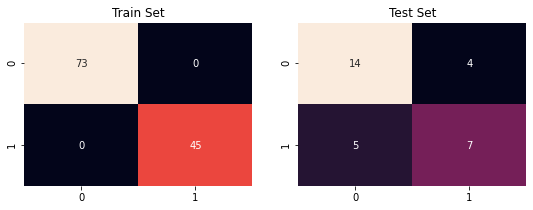

In [32]:
plot_cm(score['cm train'], score['cm test'])

In [33]:
score

{'accuracy train': 1.0,
 'accuracy test': 0.7,
 'f1_score train': 1.0,
 'f1_score test': 0.6086956521739131,
 'cm train': array([[73,  0],
        [ 0, 45]]),
 'cm test': array([[14,  4],
        [ 5,  7]]),
 'sensitivity train': 1.0,
 'sensitivity test': 0.5833333333333334,
 'specificity train': 1.0,
 'specificity test': 0.7777777777777778}

In [34]:
from functions import test_sk_models
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [35]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="sigmoid", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]

In [36]:
test_sk_models(classifiers, X_train, y_train, X_test, y_test, preprocessor)

->  KNeighborsClassifier(n_neighbors=3) :
------------------------------------------------------
F1 Score on Train Set: 0.874
F1 Score on Test Set: 0.909

Accuracy on Train Set: 0.907
Accuracy on Test Set: 0.933

Confusion Matrix on Train Set:
[[69  4]
 [ 7 38]]

Confusion Matrix on Test Set:
[[18  0]
 [ 2 10]]

Sensitivity on Train Set 0.8444444444444444
Sensitivity on Test Set 0.8333333333333334

Specificity on Train Set 0.9452054794520548
Specificity on Test Set 1.0

------------------------------------------------------

->  SVC(C=0.025, kernel='sigmoid') :
------------------------------------------------------
F1 Score on Train Set: 0.000
F1 Score on Test Set: 0.000

Accuracy on Train Set: 0.619
Accuracy on Test Set: 0.600

Confusion Matrix on Train Set:
[[73  0]
 [45  0]]

Confusion Matrix on Test Set:
[[18  0]
 [12  0]]

Sensitivity on Train Set 0.0
Sensitivity on Test Set 0.0

Specificity on Train Set 1.0
Specificity on Test Set 1.0

--------------------------------------------

## Analyse de chaque examen individuellement

In [37]:
xqrs.head()

,Key,Date,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,0.0,0.0,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124017,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,1.0,10000.0,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124018,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,2.0,20000.0,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124019,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,3.0,30000.0,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124020,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,4.0,40000.0,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [38]:
from functions import preprocessing

In [39]:
key_to_loop_over = count_nan_by_key[(count_nan_by_key[('Total', 'Percent')] < 10) &\
                                    (count_nan_by_key[('Total', 'Crisis')] > 5)].index.tolist()

key_to_loop_over

['train_01_tcp_ar_11077_s001_t000',
 'train_01_tcp_ar_11077_s001_t002',
 'train_01_tcp_ar_11077_s001_t004',
 'train_01_tcp_ar_11077_s001_t005',
 'train_01_tcp_ar_11077_s001_t006',
 'train_01_tcp_ar_11077_s001_t008',
 'train_01_tcp_ar_11077_s001_t009',
 'train_01_tcp_ar_11077_s002_t002',
 'train_01_tcp_ar_11077_s002_t003',
 'train_01_tcp_ar_11077_s002_t005',
 'train_01_tcp_ar_11077_s002_t006',
 'train_01_tcp_ar_11077_s002_t007',
 'train_01_tcp_ar_11077_s003_t001',
 'train_01_tcp_ar_11077_s003_t002',
 'train_01_tcp_ar_11077_s003_t003',
 'train_01_tcp_ar_11077_s003_t004',
 'train_01_tcp_ar_11077_s003_t006',
 'train_01_tcp_ar_11077_s003_t009']

In [40]:
global_score = {}
for key in key_to_loop_over:
    print(' -> ', key, ' training.....\n')
    preprocessor, X_train, y_train, X_test, y_test = preprocessing(xqrs, [key])
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier())])
    
    clf.fit(X_train, y_train)
    global_score[key] = predict_and_cm(clf, X_train, y_train, X_test, y_test)
    print('     .......Done\n----------------------------------------------------------\n')

->  train_01_tcp_ar_11077_s001_t000  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t002  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t004  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t005  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t006  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t008  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t009  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s002_t002  training.....

     .......Done
---------------------

In [41]:
pd.DataFrame(global_score).T

,accuracy train,accuracy test,f1_score train,f1_score test,cm train,cm test,sensitivity train,sensitivity test,specificity train,specificity test
train_01_tcp_ar_11077_s001_t000,1,0.566667,1,0.48,"[[73, 0], [0, 45]]","[[11, 7], [6, 6]]",1,0.5,1,0.611111
train_01_tcp_ar_11077_s001_t002,1,0.714286,1,0,"[[40, 0], [0, 12]]","[[10, 1], [3, 0]]",1,0,1,0.909091
train_01_tcp_ar_11077_s001_t004,1,0.8,1,0.8,"[[20, 0], [0, 18]]","[[4, 1], [1, 4]]",1,0.8,1,0.8
train_01_tcp_ar_11077_s001_t005,1,0.76,1,0.666667,"[[60, 0], [0, 37]]","[[13, 3], [3, 6]]",1,0.666667,1,0.8125
train_01_tcp_ar_11077_s001_t006,1,0.923077,1,0.8,"[[39, 0], [0, 9]]","[[10, 1], [0, 2]]",1,1,1,0.909091
train_01_tcp_ar_11077_s001_t008,1,0.846154,1,0.75,"[[31, 0], [0, 17]]","[[8, 1], [1, 3]]",1,0.75,1,0.888889
train_01_tcp_ar_11077_s001_t009,1,0.866667,1,0.5,"[[47, 0], [0, 11]]","[[12, 0], [2, 1]]",1,0.333333,1,1
train_01_tcp_ar_11077_s002_t002,1,0.8,1,0,"[[65, 0], [0, 11]]","[[16, 1], [3, 0]]",1,0,1,0.941176
train_01_tcp_ar_11077_s002_t003,1,0.818182,1,0.5,"[[70, 0], [0, 18]]","[[16, 1], [3, 2]]",1,0.4,1,0.941176
train_01_tcp_ar_11077_s002_t005,1,0.947368,1,0.666667,"[[66, 0], [0, 8]]","[[17, 0], [1, 1]]",1,0.5,1,1


In [42]:
preprocessor, X_train, y_train, X_test, y_test = preprocessing(xqrs, key_to_loop_over)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                    ('classifier', SVC())])

clf.fit(X_train, y_train)
score = predict_and_cm(clf, X_train, y_train, X_test, y_test)

In [43]:
score

{'accuracy train': 0.7536945812807881,
 'accuracy test': 0.7540983606557377,
 'f1_score train': 0.05660377358490566,
 'f1_score test': 0.07407407407407407,
 'cm train': array([[909,   0],
        [300,   9]]),
 'cm test': array([[227,   1],
        [ 74,   3]]),
 'sensitivity train': 0.02912621359223301,
 'sensitivity test': 0.03896103896103896,
 'specificity train': 1.0,
 'specificity test': 0.9956140350877193}

In [44]:
from sklearn.linear_model import SGDClassifier

In [45]:
classifiers = {
    'KN_Clf': KNeighborsClassifier(3),
    'Tree_Clf': DecisionTreeClassifier(),
    'Forest_Clf': RandomForestClassifier(),
    'Ada_Clf': AdaBoostClassifier(),
    'GaussianNB': GaussianNB(),
    'QDA': QuadraticDiscriminantAnalysis(),
    'SGD': SGDClassifier(),
    'SVC': SVC()
}

In [46]:
classifiers

{'KN_Clf': KNeighborsClassifier(n_neighbors=3),
 'Tree_Clf': DecisionTreeClassifier(),
 'Forest_Clf': RandomForestClassifier(),
 'Ada_Clf': AdaBoostClassifier(),
 'GaussianNB': GaussianNB(),
 'QDA': QuadraticDiscriminantAnalysis(),
 'SGD': SGDClassifier(),
 'SVC': SVC()}

In [47]:
clf_score = {}
for classifier in classifiers:
    print(' -> ', classifier, ' training.....')
    preprocessor, X_train, y_train, X_test, y_test = preprocessing(xqrs, key_to_loop_over)
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classifiers[classifier])])

    clf.fit(X_train, y_train)
    clf_score[classifier] = predict_and_cm(clf, X_train, y_train, X_test, y_test)
    print('     .......Done\n----------------------------------------------------------\n')

->  KN_Clf  training.....
     .......Done
----------------------------------------------------------

 ->  Tree_Clf  training.....
     .......Done
----------------------------------------------------------

 ->  Forest_Clf  training.....
     .......Done
----------------------------------------------------------

 ->  Ada_Clf  training.....
     .......Done
----------------------------------------------------------

 ->  GaussianNB  training.....
     .......Done
----------------------------------------------------------

 ->  QDA  training.....
     .......Done
----------------------------------------------------------

 ->  SGD  training.....
     .......Done
----------------------------------------------------------

 ->  SVC  training.....
     .......Done
----------------------------------------------------------



In [48]:
pd.DataFrame(clf_score).T

,accuracy train,accuracy test,f1_score train,f1_score test,cm train,cm test,sensitivity train,sensitivity test,specificity train,specificity test
KN_Clf,0.885878,0.767213,0.756567,0.458015,"[[863, 46], [93, 216]]","[[204, 24], [47, 30]]",0.699029,0.38961,0.949395,0.894737
Tree_Clf,1,0.672131,1,0.324324,"[[909, 0], [0, 309]]","[[181, 47], [53, 24]]",1,0.311688,1,0.79386
Forest_Clf,1,0.816393,1,0.5,"[[909, 0], [0, 309]]","[[221, 7], [49, 28]]",1,0.363636,1,0.969298
Ada_Clf,0.812808,0.747541,0.544,0.330435,"[[854, 55], [173, 136]]","[[209, 19], [58, 19]]",0.440129,0.246753,0.939494,0.916667
GaussianNB,0.370279,0.360656,0.41673,0.414414,"[[177, 732], [35, 274]]","[[41, 187], [8, 69]]",0.886731,0.896104,0.194719,0.179825
QDA,0.375205,0.363934,0.441673,0.429412,"[[156, 753], [8, 301]]","[[38, 190], [4, 73]]",0.97411,0.948052,0.171617,0.166667
SGD,0.711002,0.695082,0.323077,0.330935,"[[782, 127], [225, 84]]","[[189, 39], [54, 23]]",0.271845,0.298701,0.860286,0.828947
SVC,0.753695,0.754098,0.0566038,0.0740741,"[[909, 0], [300, 9]]","[[227, 1], [74, 3]]",0.0291262,0.038961,1,0.995614


## Graphical Model Comparison

In [49]:
xqrs_compare = xqrs[xqrs.Key.isin(key_to_loop_over)]
xqrs_compare

,Key,Date,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,0.0,0.0,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124017,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,1.0,10000.0,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124018,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,2.0,20000.0,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124019,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,3.0,30000.0,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124020,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,4.0,40000.0,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126113,train_01_tcp_ar_11077_s002_t002,17/12/2013,955,1.000000,1.0,91.0,910000.0,763.822115,8.966721,4.013290,0.0,0.0,0.0,0.0,4.219232,765.625000,23.43750,0.005524,0.011739,78.562341,80.000000,77.575758,0.888390,12.300314,1.276431,8.359089,9.636487,2.459390,1.863807,32.971953,0.403675,1.362793,3.351639,2.459390,0.0
126114,train_01_tcp_ar_11077_s002_t002,17/12/2013,955,1.000000,1.0,92.0,920000.0,755.408654,4.378504,1.691456,0.0,0.0,0.0,0.0,1.953125,753.906250,11.71875,0.002586,0.005796,79.429667,80.000000,78.769231,0.441607,16.125235,1.543411,9.009313,10.447792,4.779218,2.376265,161.126754,0.480618,1.763575,8.428511,4.779218,0.0
126115,train_01_tcp_ar_11077_s002_t002,17/12/2013,955,1.000000,1.0,93.0,930000.0,754.807692,3.956013,2.684314,0.0,0.0,0.0,0.0,2.762136,753.906250,15.62500,0.003659,0.005241,79.492466,80.418848,78.769231,0.401272,14.686834,1.477786,9.834500,9.938403,4.801360,2.399829,166.709640,0.514935,1.807891,8.680335,4.801360,0.0
126116,train_01_tcp_ar_11077_s002_t002,17/12/2013,955,1.000000,1.0,94.0,940000.0,751.674107,5.674008,3.236277,0.0,0.0,0.0,0.0,3.250196,750.000000,19.53125,0.004324,0.007548,79.826046,80.842105,78.769231,0.580076,21.521326,1.845410,10.899422,11.662086,4.517901,2.434253,158.318468,0.675290,1.939091,8.760621,4.517901,0.0


In [50]:
xqrs_compare.drop(['Date', 'exam_duration', 'SWT_vs_XQRS', 'Pan_vs_XQRS',
            'interval_index', 'interval_start_time', 'Key'], axis=1, inplace=True)

In [51]:
X = xqrs_compare.iloc[:, :-1]
y = xqrs_compare.iloc[:, -1:]

In [52]:
y.label = y.label.apply(lambda x: 1 if x!= 0 else 0)
X = X.replace([np.inf, -np.inf], np.nan)

In [53]:
X = SimpleImputer(strategy='mean').fit_transform(X)

In [54]:
X = StandardScaler().fit_transform(X)

In [55]:
from functions import model_comparison

f1 

KN_Clf: 0.246526 (0.116940)
Tree_Clf: 0.306769 (0.096852)
Forest_Clf: 0.205397 (0.149017)
Ada_Clf: 0.261650 (0.130355)
GaussianNB: 0.383268 (0.119633)
QDA: 0.405106 (0.102328)
SGD: 0.230329 (0.136983)
SVC: 0.012417 (0.019696)


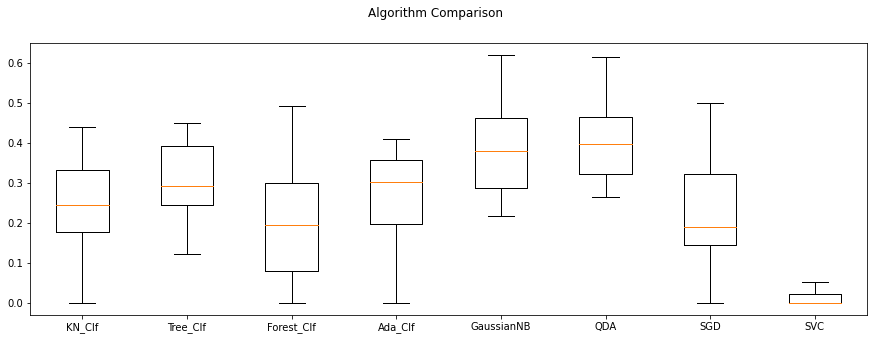

In [56]:
model_comparison(X, y, classifiers)

## Lag of 3 days

### All exams in same time

In [57]:
from functions import series_to_supervised

In [58]:
xqrs.head()

,Key,Date,exam_duration,SWT_vs_XQRS,Pan_vs_XQRS,interval_index,interval_start_time,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,0.0,0.0,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124017,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,1.0,10000.0,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124018,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,2.0,20000.0,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124019,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,3.0,30000.0,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
124020,train_01_tcp_ar_11077_s001_t009,16/12/2013,725,0.998914,1.0,4.0,40000.0,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [59]:
late_xqrs = xqrs[xqrs.Key.isin(key_to_loop_over)].dropna(subset=['label']).drop(['Date', 'exam_duration', 'SWT_vs_XQRS', 'Pan_vs_XQRS', 'interval_index', 'interval_start_time'], axis=1)

In [60]:
late_xqrs = late_xqrs.replace([np.inf, -np.inf], np.nan)

In [61]:
key_cols = late_xqrs.Key.tolist()

In [62]:
late_xqrs = late_xqrs.groupby(late_xqrs['Key']).transform(lambda x: x.fillna(x.mean()))

In [63]:
late_xqrs.insert(0, 'Key', key_cols)
late_xqrs

,Key,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train_01_tcp_ar_11077_s001_t009,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
124017,train_01_tcp_ar_11077_s001_t009,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
124018,train_01_tcp_ar_11077_s001_t009,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
124019,train_01_tcp_ar_11077_s001_t009,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
124020,train_01_tcp_ar_11077_s001_t009,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126112,train_01_tcp_ar_11077_s002_t002,753.004808,3.620346,3.367214,0.0,0.0,0.0,0.0,3.382912,753.906250,11.71875,0.004493,0.004808,79.682468,80.418848,79.175258,0.368403,12.990728,1.376876,8.219842,9.434929,3.359601,1.976076,59.905876,0.409138,1.326887,4.457812,3.359601,0.0
126113,train_01_tcp_ar_11077_s002_t002,763.822115,8.966721,4.013290,0.0,0.0,0.0,0.0,4.219232,765.625000,23.43750,0.005524,0.011739,78.562341,80.000000,77.575758,0.888390,12.300314,1.276431,8.359089,9.636487,2.459390,1.863807,32.971953,0.403675,1.362793,3.351639,2.459390,0.0
126114,train_01_tcp_ar_11077_s002_t002,755.408654,4.378504,1.691456,0.0,0.0,0.0,0.0,1.953125,753.906250,11.71875,0.002586,0.005796,79.429667,80.000000,78.769231,0.441607,16.125235,1.543411,9.009313,10.447792,4.779218,2.376265,161.126754,0.480618,1.763575,8.428511,4.779218,0.0
126115,train_01_tcp_ar_11077_s002_t002,754.807692,3.956013,2.684314,0.0,0.0,0.0,0.0,2.762136,753.906250,15.62500,0.003659,0.005241,79.492466,80.418848,78.769231,0.401272,14.686834,1.477786,9.834500,9.938403,4.801360,2.399829,166.709640,0.514935,1.807891,8.680335,4.801360,0.0


In [64]:
%%time

d_xqrs = {k:late_xqrs[late_xqrs.Key == k] for k in late_xqrs.Key.unique()}

CPU times: user 10.7 ms, sys: 1.72 ms, total: 12.4 ms
Wall time: 10.9 ms


In [65]:
%%time

big_df = pd.DataFrame()
for key in d_xqrs.keys():
    big_df = big_df.append(series_to_supervised(d_xqrs[key], 3, 1), ignore_index=True)

CPU times: user 108 ms, sys: 0 ns, total: 108 ms
Wall time: 107 ms


In [66]:
big_df.head()

,Key(t-3),mean_nni(t-3),sdnn(t-3),sdsd(t-3),nni_50(t-3),pnni_50(t-3),nni_20(t-3),pnni_20(t-3),rmssd(t-3),median_nni(t-3),range_nni(t-3),cvsd(t-3),cvnni(t-3),mean_hr(t-3),max_hr(t-3),min_hr(t-3),std_hr(t-3),lf(t-3),hf(t-3),vlf(t-3),lf_hf_ratio(t-3),csi(t-3),cvi(t-3),Modified_csi(t-3),sampen(t-3),sd1(t-3),sd2(t-3),ratio_sd2_sd1(t-3),label(t-3),Key(t-2),mean_nni(t-2),sdnn(t-2),sdsd(t-2),nni_50(t-2),pnni_50(t-2),nni_20(t-2),pnni_20(t-2),rmssd(t-2),median_nni(t-2),range_nni(t-2),cvsd(t-2),cvnni(t-2),mean_hr(t-2),max_hr(t-2),min_hr(t-2),std_hr(t-2),lf(t-2),hf(t-2),vlf(t-2),lf_hf_ratio(t-2),...,rmssd(t-1),median_nni(t-1),range_nni(t-1),cvsd(t-1),cvnni(t-1),mean_hr(t-1),max_hr(t-1),min_hr(t-1),std_hr(t-1),lf(t-1),hf(t-1),vlf(t-1),lf_hf_ratio(t-1),csi(t-1),cvi(t-1),Modified_csi(t-1),sampen(t-1),sd1(t-1),sd2(t-1),ratio_sd2_sd1(t-1),label(t-1),Key(t),mean_nni(t),sdnn(t),sdsd(t),nni_50(t),pnni_50(t),nni_20(t),pnni_20(t),rmssd(t),median_nni(t),range_nni(t),cvsd(t),cvnni(t),mean_hr(t),max_hr(t),min_hr(t),std_hr(t),lf(t),hf(t),vlf(t),lf_hf_ratio(t),csi(t),cvi(t),Modified_csi(t),sampen(t),sd1(t),sd2(t),ratio_sd2_sd1(t),label(t)
0,train_01_tcp_ar_11077_s001_t009,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0,train_01_tcp_ar_11077_s001_t009,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.06250,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,...,2.983448,777.34375,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0,train_01_tcp_ar_11077_s001_t009,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
1,train_01_tcp_ar_11077_s001_t009,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0,train_01_tcp_ar_11077_s001_t009,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.34375,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,...,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0,train_01_tcp_ar_11077_s001_t009,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.53125,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
2,train_01_tcp_ar_11077_s001_t009,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0,train_01_tcp_ar_11077_s001_t009,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,...,5.167483,769.53125,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0,train_01_tcp_ar_11077_s001_t009,773.737981,7.724363,2.500373,0.0,0.0,0.0,0.0,2.983448,773.43750,19.53125,0.003856,0.009983,77.552797,78.769231,76.800000,0.747102,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0.0
3,train_01_tcp_ar_11077_s001_t009,77

In [67]:
big_df.shape

(1454, 116)

In [68]:
y = big_df.iloc[:, -1:].rename(columns={'label(t)': 'label'})
y.label = y.label.apply(lambda x: 1 if x != 0 else 0)
y.head()

,label
0,0
1,0
2,0
3,0
4,0


In [69]:
X = big_df[big_df.columns.drop(list(big_df.filter(regex='label|Key')))]
X.head()

,mean_nni(t-3),sdnn(t-3),sdsd(t-3),nni_50(t-3),pnni_50(t-3),nni_20(t-3),pnni_20(t-3),rmssd(t-3),median_nni(t-3),range_nni(t-3),cvsd(t-3),cvnni(t-3),mean_hr(t-3),max_hr(t-3),min_hr(t-3),std_hr(t-3),lf(t-3),hf(t-3),vlf(t-3),lf_hf_ratio(t-3),csi(t-3),cvi(t-3),Modified_csi(t-3),sampen(t-3),sd1(t-3),sd2(t-3),ratio_sd2_sd1(t-3),mean_nni(t-2),sdnn(t-2),sdsd(t-2),nni_50(t-2),pnni_50(t-2),nni_20(t-2),pnni_20(t-2),rmssd(t-2),median_nni(t-2),range_nni(t-2),cvsd(t-2),cvnni(t-2),mean_hr(t-2),max_hr(t-2),min_hr(t-2),std_hr(t-2),lf(t-2),hf(t-2),vlf(t-2),lf_hf_ratio(t-2),csi(t-2),cvi(t-2),Modified_csi(t-2),...,pnni_50(t-1),nni_20(t-1),pnni_20(t-1),rmssd(t-1),median_nni(t-1),range_nni(t-1),cvsd(t-1),cvnni(t-1),mean_hr(t-1),max_hr(t-1),min_hr(t-1),std_hr(t-1),lf(t-1),hf(t-1),vlf(t-1),lf_hf_ratio(t-1),csi(t-1),cvi(t-1),Modified_csi(t-1),sampen(t-1),sd1(t-1),sd2(t-1),ratio_sd2_sd1(t-1),mean_nni(t),sdnn(t),sdsd(t),nni_50(t),pnni_50(t),nni_20(t),pnni_20(t),rmssd(t),median_nni(t),range_nni(t),cvsd(t),cvnni(t),mean_hr(t),max_hr(t),min_hr(t),std_hr(t),lf(t),hf(t),vlf(t),lf_hf_ratio(t),csi(t),cvi(t),Modified_csi(t),sampen(t),sd1(t),sd2(t),ratio_sd2_sd1(t)
0,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.06250,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,...,0.0,0.0,0.0,2.983448,777.34375,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098
1,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.34375,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,...,0.0,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.53125,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098
2,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,...,0.0,0.0,0.0,5.167483,769.53125,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,773.737981,7.724363,2.500373,0.0,0.0,0.0,0.0,2.983448,773.43750,19.53125,0.003856,0.009983,77.552797,78.769231,76.800000,0.747102,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098
3,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,

In [70]:
X.shape

(1454, 108)

f1 

KN_Clf: 0.232640 (0.116525)
Tree_Clf: 0.290101 (0.127160)
Forest_Clf: 0.165346 (0.132671)
Ada_Clf: 0.267564 (0.136609)
GaussianNB: 0.392663 (0.122436)
QDA: 0.404731 (0.109616)
SGD: 0.179545 (0.217026)
SVC: 0.000000 (0.000000)


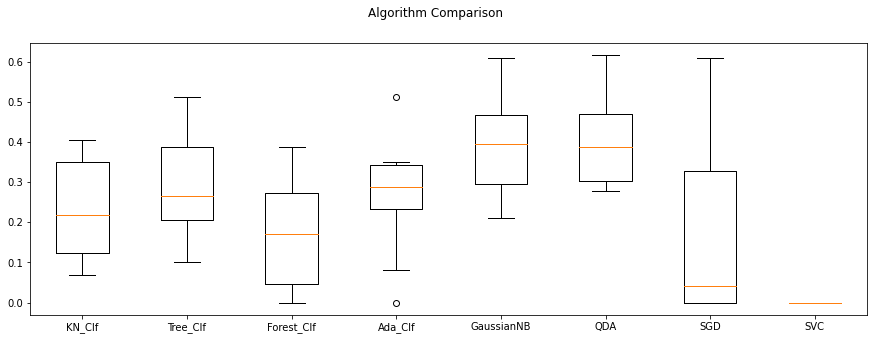

In [71]:
model_comparison(X, y, classifiers)

### Exam by Exam

In [72]:
key_cols = big_df['Key(t)'].tolist()
labs = big_df['label(t)'].tolist()

big_df_clean = big_df[big_df.columns.drop(list(big_df.filter(regex='label|Key')))]

big_df_clean.insert(0, 'Key', key_cols)
big_df_clean['label'] = [1 if x != 0 else 0 for x in labs]
big_df_clean.head()

,Key,mean_nni(t-3),sdnn(t-3),sdsd(t-3),nni_50(t-3),pnni_50(t-3),nni_20(t-3),pnni_20(t-3),rmssd(t-3),median_nni(t-3),range_nni(t-3),cvsd(t-3),cvnni(t-3),mean_hr(t-3),max_hr(t-3),min_hr(t-3),std_hr(t-3),lf(t-3),hf(t-3),vlf(t-3),lf_hf_ratio(t-3),csi(t-3),cvi(t-3),Modified_csi(t-3),sampen(t-3),sd1(t-3),sd2(t-3),ratio_sd2_sd1(t-3),mean_nni(t-2),sdnn(t-2),sdsd(t-2),nni_50(t-2),pnni_50(t-2),nni_20(t-2),pnni_20(t-2),rmssd(t-2),median_nni(t-2),range_nni(t-2),cvsd(t-2),cvnni(t-2),mean_hr(t-2),max_hr(t-2),min_hr(t-2),std_hr(t-2),lf(t-2),hf(t-2),vlf(t-2),lf_hf_ratio(t-2),csi(t-2),cvi(t-2),...,nni_20(t-1),pnni_20(t-1),rmssd(t-1),median_nni(t-1),range_nni(t-1),cvsd(t-1),cvnni(t-1),mean_hr(t-1),max_hr(t-1),min_hr(t-1),std_hr(t-1),lf(t-1),hf(t-1),vlf(t-1),lf_hf_ratio(t-1),csi(t-1),cvi(t-1),Modified_csi(t-1),sampen(t-1),sd1(t-1),sd2(t-1),ratio_sd2_sd1(t-1),mean_nni(t),sdnn(t),sdsd(t),nni_50(t),pnni_50(t),nni_20(t),pnni_20(t),rmssd(t),median_nni(t),range_nni(t),cvsd(t),cvnni(t),mean_hr(t),max_hr(t),min_hr(t),std_hr(t),lf(t),hf(t),vlf(t),lf_hf_ratio(t),csi(t),cvi(t),Modified_csi(t),sampen(t),sd1(t),sd2(t),ratio_sd2_sd1(t),label
0,train_01_tcp_ar_11077_s001_t009,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.06250,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,...,0.0,0.0,2.983448,777.34375,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0
1,train_01_tcp_ar_11077_s001_t009,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.34375,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,...,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.53125,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0
2,train_01_tcp_ar_11077_s001_t009,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.62500,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,...,0.0,0.0,5.167483,769.53125,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,773.737981,7.724363,2.500373,0.0,0.0,0.0,0.0,2.983448,773.43750,19.53125,0.003856,0.009983,77.552797,78.769231,76.800000,0.747102,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0
3,train_01_tcp_ar_11077_s001_t009,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293

In [73]:
from functions import preprocessing_lagged

In [74]:
global_score = {}
for key in key_to_loop_over:
    print(' -> ', key, ' training.....\n')
    preprocessor, X_train, y_train, X_test, y_test = preprocessing_lagged(big_df_clean, [key])
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', SVC())])
    
    clf.fit(X_train, y_train)
    global_score[key] = predict_and_cm(clf, X_train, y_train, X_test, y_test)
    print('     .......Done\n----------------------------------------------------------\n')

->  train_01_tcp_ar_11077_s001_t000  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t002  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t004  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t005  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t006  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t008  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s001_t009  training.....

     .......Done
----------------------------------------------------------

 ->  train_01_tcp_ar_11077_s002_t002  training.....

     .......Done
---------------------

In [75]:
pd.DataFrame(global_score).T

,accuracy train,accuracy test,f1_score train,f1_score test,cm train,cm test,sensitivity train,sensitivity test,specificity train,specificity test
train_01_tcp_ar_11077_s001_t000,0.852174,0.655172,0.795181,0.5,"[[65, 8], [9, 33]]","[[14, 4], [6, 5]]",0.785714,0.454545,0.890411,0.777778
train_01_tcp_ar_11077_s001_t002,0.979592,0.769231,0.952381,0,"[[38, 0], [1, 10]]","[[10, 0], [3, 0]]",0.909091,0,1,1
train_01_tcp_ar_11077_s001_t004,1,0.888889,1,0.857143,"[[19, 0], [0, 16]]","[[5, 0], [1, 3]]",1,0.75,1,1
train_01_tcp_ar_11077_s001_t005,0.915789,0.583333,0.897436,0.285714,"[[52, 6], [2, 35]]","[[12, 3], [7, 2]]",0.945946,0.222222,0.896552,0.8
train_01_tcp_ar_11077_s001_t006,0.911111,0.833333,0.666667,0,"[[37, 0], [4, 4]]","[[10, 0], [2, 0]]",0.5,0,1,1
train_01_tcp_ar_11077_s001_t008,0.888889,0.75,0.8,0.4,"[[30, 0], [5, 10]]","[[8, 0], [3, 1]]",0.666667,0.25,1,1
train_01_tcp_ar_11077_s001_t009,1,0.785714,1,0,"[[45, 0], [0, 10]]","[[11, 0], [3, 0]]",1,0,1,1
train_01_tcp_ar_11077_s002_t002,0.986301,0.894737,0.947368,0.5,"[[63, 0], [1, 9]]","[[16, 0], [2, 1]]",0.9,0.333333,1,1
train_01_tcp_ar_11077_s002_t003,0.928571,0.772727,0.785714,0,"[[67, 0], [6, 11]]","[[17, 0], [5, 0]]",0.647059,0,1,1
train_01_tcp_ar_11077_s002_t005,0.986111,0.888889,0.933333,0,"[[64, 0], [1, 7]]","[[16, 0], [2, 0]]",0.875,0,1,1


## GridSearchCV on SVC

In [339]:
late_xqrs.head()

,Key,mean_nni,sdnn,sdsd,nni_50,pnni_50,nni_20,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr,lf,hf,vlf,lf_hf_ratio,csi,cvi,Modified_csi,sampen,sd1,sd2,ratio_sd2_sd1,label
124016,train_01_tcp_ar_11077_s001_t009,781.250000,11.418988,2.511033,0.0,0.0,0.0,0.0,3.533336,779.296875,27.34375,0.004523,0.014616,76.814977,77.969543,75.294118,1.070304,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0
124017,train_01_tcp_ar_11077_s001_t009,788.161058,6.409474,2.911547,0.0,0.0,0.0,0.0,3.189440,789.062500,19.53125,0.004047,0.008132,76.131232,77.185930,75.294118,0.596391,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0
124018,train_01_tcp_ar_11077_s001_t009,774.338942,4.265345,2.965636,0.0,0.0,0.0,0.0,2.983448,777.343750,11.71875,0.003853,0.005508,77.487619,77.969543,76.800000,0.410248,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0
124019,train_01_tcp_ar_11077_s001_t009,770.733173,8.644590,3.382912,0.0,0.0,0.0,0.0,3.906250,765.625000,23.43750,0.005068,0.011216,77.856899,78.769231,76.417910,0.830201,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0
124020,train_01_tcp_ar_11077_s001_t009,772.536058,17.038434,3.725756,0.0,0.0,0.0,0.0,5.167483,769.531250,42.96875,0.006689,0.022055,77.700889,79.585492,75.294118,1.633524,77.793753,2.190293,67.792737,36.431533,6.012098,2.885467,431.422187,0.741793,2.888883,17.524077,6.012098,0


In [340]:
late_xqrs.label = late_xqrs.label.apply(lambda x: 1 if x != 0 else 0)
late_xqrs.label.value_counts()

0    1137
1     371
Name: label, dtype: int64

In [355]:
X = late_xqrs.iloc[:, 1:-1]
y = late_xqrs.iloc[:, -1:]

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [357]:
from sklearn.model_selection import GridSearchCV

In [358]:
C_range = np.logspace(-2, 6, 9)
gamma_range = np.logspace(-7, 1, 9)
param_grid = dict(gamma=gamma_range, C=C_range)

In [359]:
grid = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, verbose=1, scoring='f1')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:   24.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.3min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06]),
                         'gamma': array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01])},
             scoring='f1_weighted', verbose=1)

In [360]:
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 1.0} with a score of 0.74


In [361]:
y_pred = grid.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.4273504273504274

## Features engineering

In [371]:
X = late_xqrs.iloc[:, 1:-1]
y = late_xqrs.iloc[:, -1:]

In [372]:
y

,label
124016,0
124017,0
124018,0
124019,0
124020,0
...,...
126112,0
126113,0
126114,0
126115,0


In [373]:
X = StandardScaler().fit_transform(X)

In [374]:
clf = DecisionTreeClassifier()

In [375]:
clf = clf.fit(X, y)

In [376]:
dic_feats_imp = dict(zip(late_xqrs.iloc[:,1:-1].columns, clf.feature_importances_))

feats_importance = pd.DataFrame(dic_feats_imp, index=[0]).T.sort_values([0], ascending=False).rename(columns={0: 'Importance'})
feats_importance

,Importance
lf_hf_ratio,0.155414
lf,0.091117
cvi,0.083621
vlf,0.077676
sd1,0.075262
max_hr,0.072743
sampen,0.064787
hf,0.062441
median_nni,0.045798
std_hr,0.036717


In [377]:
feats_importance.to_csv('../to_csv/less_feats/features_importance_v2.csv')

In [378]:
ordered_xqrs = late_xqrs[['Key'] + feats_importance.index.tolist() + ['label']]

In [379]:
ordered_xqrs

,Key,lf_hf_ratio,lf,cvi,vlf,sd1,max_hr,sampen,hf,median_nni,std_hr,csi,Modified_csi,cvnni,cvsd,mean_nni,ratio_sd2_sd1,min_hr,sdsd,sd2,sdnn,rmssd,mean_hr,range_nni,pnni_20,nni_20,pnni_50,nni_50,label
124016,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793,2.190293,779.296875,1.070304,6.012098,431.422187,0.014616,0.004523,781.250000,6.012098,75.294118,2.511033,17.524077,11.418988,3.533336,76.814977,27.34375,0.0,0.0,0.0,0.0,0
124017,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.185930,0.741793,2.190293,789.062500,0.596391,6.012098,431.422187,0.008132,0.004047,788.161058,6.012098,75.294118,2.911547,17.524077,6.409474,3.189440,76.131232,19.53125,0.0,0.0,0.0,0.0,0
124018,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793,2.190293,777.343750,0.410248,6.012098,431.422187,0.005508,0.003853,774.338942,6.012098,76.800000,2.965636,17.524077,4.265345,2.983448,77.487619,11.71875,0.0,0.0,0.0,0.0,0
124019,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,78.769231,0.741793,2.190293,765.625000,0.830201,6.012098,431.422187,0.011216,0.005068,770.733173,6.012098,76.417910,3.382912,17.524077,8.644590,3.906250,77.856899,23.43750,0.0,0.0,0.0,0.0,0
124020,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,79.585492,0.741793,2.190293,769.531250,1.633524,6.012098,431.422187,0.022055,0.006689,772.536058,6.012098,75.294118,3.725756,17.524077,17.038434,5.167483,77.700889,42.96875,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126112,train_01_tcp_ar_11077_s002_t002,9.434929,12.990728,1.976076,8.219842,1.326887,80.418848,0.409138,1.376876,753.906250,0.368403,3.359601,59.905876,0.004808,0.004493,753.004808,3.359601,79.175258,3.367214,4.457812,3.620346,3.382912,79.682468,11.71875,0.0,0.0,0.0,0.0,0
126113,train_01_tcp_ar_11077_s002_t002,9.636487,12.300314,1.863807,8.359089,1.362793,80.000000,0.403675,1.276431,765.625000,0.888390,2.459390,32.971953,0.011739,0.005524,763.822115,2.459390,77.575758,4.013290,3.351639,8.966721,4.219232,78.562341,23.43750,0.0,0.0,0.0,0.0,0
126114,train_01_tcp_ar_11077_s002_t002,10.447792,16.125235,2.376265,9.009313,1.763575,80.000000,0.480618,1.543411,753.906250,0.441607,4.779218,161.126754,0.005796,0.002586,755.408654,4.779218,78.769231,1.691456,8.428511,4.378504,1.953125,79.429667,11.71875,0.0,0.0,0.0,0.0,0
126115,train_01_tcp_ar_11077_s002_t002,9.938403,14.686834,2.399829,9.834500,1.807891,80.418848,0.514935,1.477786,753.906250,0.401272,4.801360,166.709640,0.005241,0.003659,754.807692,4.801360,78.769231,2.684314,8.680335,3.956013,2.762136,79.492466,15.62500,0.0,0.0,0.0,0.0,0


In [380]:
from sklearn.metrics import f1_score

In [381]:
clf = DecisionTreeClassifier()

In [383]:
for i in range(len(feats_importance.index.tolist()), 6,  -1):
    X = ordered_xqrs.iloc[:, 1:-1]
    y = ordered_xqrs.iloc[:, -1:]
    print(X.iloc[:, :i].columns.tolist())
    X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :i], y, random_state=42, stratify=y, train_size=0.8)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    print("\nNumber of features: %d" % i)
    print("f1 on train: ", f1_score(y_train, y_pred_train))
    print("f1 on test: ", f1_score(y_test, y_pred_test))

['lf_hf_ratio', 'lf', 'cvi', 'vlf', 'sd1', 'max_hr', 'sampen', 'hf', 'median_nni', 'std_hr', 'csi', 'Modified_csi', 'cvnni', 'cvsd', 'mean_nni', 'ratio_sd2_sd1', 'min_hr', 'sdsd', 'sd2', 'sdnn', 'rmssd', 'mean_hr', 'range_nni', 'pnni_20', 'nni_20', 'pnni_50', 'nni_50']

Number of features: 27
f1 on train:  1.0
f1 on test:  0.5341614906832297
['lf_hf_ratio', 'lf', 'cvi', 'vlf', 'sd1', 'max_hr', 'sampen', 'hf', 'median_nni', 'std_hr', 'csi', 'Modified_csi', 'cvnni', 'cvsd', 'mean_nni', 'ratio_sd2_sd1', 'min_hr', 'sdsd', 'sd2', 'sdnn', 'rmssd', 'mean_hr', 'range_nni', 'pnni_20', 'nni_20', 'pnni_50']

Number of features: 26
f1 on train:  1.0
f1 on test:  0.5212121212121211
['lf_hf_ratio', 'lf', 'cvi', 'vlf', 'sd1', 'max_hr', 'sampen', 'hf', 'median_nni', 'std_hr', 'csi', 'Modified_csi', 'cvnni', 'cvsd', 'mean_nni', 'ratio_sd2_sd1', 'min_hr', 'sdsd', 'sd2', 'sdnn', 'rmssd', 'mean_hr', 'range_nni', 'pnni_20', 'nni_20']

Number of features: 25
f1 on train:  1.0
f1 on test:  0.5542168674698795

## GridSearch on DecisionTree & Lite Dataset

In [384]:
X = ordered_xqrs.iloc[:, 1:8]
X

,lf_hf_ratio,lf,cvi,vlf,sd1,max_hr,sampen
124016,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793
124017,36.431533,77.793753,2.885467,67.792737,2.888883,77.185930,0.741793
124018,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793
124019,36.431533,77.793753,2.885467,67.792737,2.888883,78.769231,0.741793
124020,36.431533,77.793753,2.885467,67.792737,2.888883,79.585492,0.741793
...,...,...,...,...,...,...,...
126112,9.434929,12.990728,1.976076,8.219842,1.326887,80.418848,0.409138
126113,9.636487,12.300314,1.863807,8.359089,1.362793,80.000000,0.403675
126114,10.447792,16.125235,2.376265,9.009313,1.763575,80.000000,0.480618
126115,9.938403,14.686834,2.399829,9.834500,1.807891,80.418848,0.514935


In [385]:
y = ordered_xqrs.iloc[:, -1:]
y.label.value_counts()

0    1137
1     371
Name: label, dtype: int64

In [386]:
clf = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 5, 8, 15, None],
    'min_samples_split': [3, 5, 7, 9],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'class_weight': [{0:0.25, 1:0.75}, {0:0.2, 1:0.8}]
}

grid = GridSearchCV(clf, params, n_jobs=-1, cv=5, scoring='f1')

In [387]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

In [388]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [389]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.25, 1: 0.75}, {0: 0.2, 1: 0.8}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 15, None],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [3, 5, 7, 9],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [390]:
grid.best_params_

{'class_weight': {0: 0.2, 1: 0.8},
 'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 3,
 'min_samples_split': 7,
 'splitter': 'best'}

In [391]:
y_pred = grid.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.5664739884393064

## GridSearch on lagged lite dataset with DecisionTreeClassifier

In [392]:
X = pd.concat([ordered_xqrs.iloc[:, :8], ordered_xqrs.iloc[:, -1:]], axis=1)
X

,Key,lf_hf_ratio,lf,cvi,vlf,sd1,max_hr,sampen,label
124016,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793,0
124017,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.185930,0.741793,0
124018,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793,0
124019,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,78.769231,0.741793,0
124020,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,79.585492,0.741793,0
...,...,...,...,...,...,...,...,...,...
126112,train_01_tcp_ar_11077_s002_t002,9.434929,12.990728,1.976076,8.219842,1.326887,80.418848,0.409138,0
126113,train_01_tcp_ar_11077_s002_t002,9.636487,12.300314,1.863807,8.359089,1.362793,80.000000,0.403675,0
126114,train_01_tcp_ar_11077_s002_t002,10.447792,16.125235,2.376265,9.009313,1.763575,80.000000,0.480618,0
126115,train_01_tcp_ar_11077_s002_t002,9.938403,14.686834,2.399829,9.834500,1.807891,80.418848,0.514935,0


In [393]:
lagged_lite_xqrs = pd.DataFrame()
for key in X.Key.unique().tolist():
    df = X[X.Key == key]
    df = series_to_supervised(df, 1, 1)
    lagged_lite_xqrs = lagged_lite_xqrs.append(df)

In [394]:
lagged_lite_xqrs

,Key(t-1),lf_hf_ratio(t-1),lf(t-1),cvi(t-1),vlf(t-1),sd1(t-1),max_hr(t-1),sampen(t-1),label(t-1),Key(t),lf_hf_ratio(t),lf(t),cvi(t),vlf(t),sd1(t),max_hr(t),sampen(t),label(t)
124017,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793,0.0,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.185930,0.741793,0
124018,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.185930,0.741793,0.0,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793,0
124019,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,77.969543,0.741793,0.0,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,78.769231,0.741793,0
124020,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,78.769231,0.741793,0.0,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,79.585492,0.741793,0
124021,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,79.585492,0.741793,0.0,train_01_tcp_ar_11077_s001_t009,36.431533,77.793753,2.885467,67.792737,2.888883,78.769231,0.741793,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126112,train_01_tcp_ar_11077_s002_t002,10.763775,13.860559,2.162699,10.738607,1.362793,80.418848,0.382854,0.0,train_01_tcp_ar_11077_s002_t002,9.434929,12.990728,1.976076,8.219842,1.326887,80.418848,0.409138,0
126113,train_01_tcp_ar_11077_s002_t002,9.434929,12.990728,1.976076,8.219842,1.326887,80.418848,0.409138,0.0,train_01_tcp_ar_11077_s002_t002,9.636487,12.300314,1.863807,8.359089,1.362793,80.000000,0.403675,0
126114,train_01_tcp_ar_11077_s002_t002,9.636487,12.300314,1.863807,8.359089,1.362793,80.000000,0.403675,0.0,train_01_tcp_ar_11077_s002_t002,10.447792,16.125235,2.376265,9.009313,1.763575,80.000000,0.480618,0
126115,train_01_tcp_ar_11077_s002_t002,10.447792,16.125235,2.376265,9.009313,1.763575,80.000000,0.480618,0.0,train_01_tcp_ar_11077_s002_t002,9.938403,14.686834,2.399829,9.834500,1.807891,80.418848,0.514935,0


In [395]:
y = lagged_lite_xqrs['label(t)'].tolist()

X = lagged_lite_xqrs[lagged_lite_xqrs.columns.drop(list(lagged_lite_xqrs.filter(regex='label|Key')))]

In [396]:
clf = DecisionTreeClassifier()

params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2, 3, 5, 8, 15, None],
    'min_samples_split': [3, 5, 7, 9],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'class_weight': [{0:0.25, 1:0.75}, {0:0.2, 1:0.8}]
}

grid = GridSearchCV(clf, params, n_jobs=-1, cv=5, scoring='f1')

In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

In [398]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [399]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [{0: 0.25, 1: 0.75}, {0: 0.2, 1: 0.8}],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 8, 15, None],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [3, 5, 7, 9],
                         'splitter': ['best', 'random']},
             scoring='f1')

In [400]:
grid.best_params_

{'class_weight': {0: 0.25, 1: 0.75},
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 5,
 'min_samples_split': 9,
 'splitter': 'best'}

In [401]:
y_pred = grid.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.5287356321839081

## XGBoost

In [317]:
from xgboost import XGBClassifier

In [318]:
X = ordered_xqrs.iloc[:, 1:12]
y = ordered_xqrs.iloc[:, -1:]

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

In [402]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [403]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [404]:
y_pred = xgb.predict(X_test)
f1_score(y_test, y_pred)

0.6666666666666667

In [405]:
params = {
        'min_child_weight': [1, 2],
        'gamma': [0.4, 0.5, 0.6],
        'subsample': [0.9, 1.0, 1.1],
        'colsample_bytree': [0.75, 0.8, 0.85],
        'max_depth': [8, 10, 12]
        }

In [406]:
xgb = XGBClassifier(n_jobs=-1)

In [407]:
grid = GridSearchCV(xgb, params, n_jobs=-1, scoring='f1_weighted', verbose=1)

In [408]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 787 out of 810 | elapsed:    9.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    9.6s finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [409]:
grid.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.4,
 'max_depth': 8,
 'min_child_weight': 2,
 'subsample': 0.9}

In [410]:
y_pred = grid.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.6666666666666667

## XGBoost on lagged dataset (10 sec)

In [411]:
y = lagged_lite_xqrs['label(t)'].tolist()

X = lagged_lite_xqrs[lagged_lite_xqrs.columns.drop(list(lagged_lite_xqrs.filter(regex='label|Key')))]

In [412]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

In [413]:
xgb = XGBClassifier()

In [414]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [415]:
y_pred = xgb.predict(X_test)
f1_score(y_test, y_pred)

0.6666666666666667

In [416]:
params = {
        'min_child_weight': [1, 2],
        'gamma': [0.4, 0.5, 0.6],
        'subsample': [0.9, 1.0, 1.1],
        'colsample_bytree': [0.75, 0.8, 0.85],
        'max_depth': [8, 10, 12]
        }

In [417]:
xgb = XGBClassifier(n_jobs=-1)

In [418]:
grid = GridSearchCV(xgb, params, n_jobs=-1, scoring='f1_macro', verbose=1)

In [419]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 787 out of 810 | elapsed:    9.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:    9.6s finished


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=

In [420]:
grid.best_params_

{'colsample_bytree': 0.75,
 'gamma': 0.5,
 'max_depth': 8,
 'min_child_weight': 1,
 'subsample': 0.9}

In [421]:
y_pred = grid.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.625

## SVC on lite dataset

In [422]:
X = ordered_xqrs.iloc[:, 1:12]
y = ordered_xqrs.iloc[:, -1:]

In [423]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

In [424]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [425]:
C_range = np.logspace(-2, 6, 9)
gamma_range = np.logspace(-7, 1, 9)
param_grid = dict(gamma=gamma_range, C=C_range)

In [426]:
grid = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, verbose=1, scoring='f1')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:   30.0s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.7min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06]),
                         'gamma': array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01])},
             scoring='f1', verbose=1)

In [427]:
grid.best_params_

{'C': 100.0, 'gamma': 1.0}

In [428]:
y_pred = grid.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.6122448979591837

## SVC on lite lagged dataset (10 sec)

In [429]:
y = lagged_lite_xqrs['label(t)'].tolist()

X = lagged_lite_xqrs[lagged_lite_xqrs.columns.drop(list(lagged_lite_xqrs.filter(regex='label|Key')))]

In [430]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, train_size=0.8)

In [431]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [432]:
C_range = np.logspace(-2, 6, 9)
gamma_range = np.logspace(-7, 1, 9)
param_grid = dict(gamma=gamma_range, C=C_range)

In [433]:
grid = GridSearchCV(SVC(), param_grid=param_grid, n_jobs=-1, verbose=1, scoring='f1')
grid.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:   19.4s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  1.2min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06]),
                         'gamma': array([1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00,
       1.e+01])},
             scoring='f1', verbose=1)

In [435]:
grid.best_params_

{'C': 100.0, 'gamma': 1.0}

In [434]:
y_pred = grid.best_estimator_.predict(X_test)
f1_score(y_test, y_pred)

0.588235294117647